# Price Elasticity of Demand, Statistical Modeling with Python

In [1]:
%matplotlib inline

from __future__ import print_function
from statsmodels.compat import lzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
beef = pd.read_csv('https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/beef.csv')
beef.head()

,Year,Quarter,Quantity,Price
0,1977,1,22.9976,142.1667
1,1977,2,22.6131,143.9333
2,1977,3,23.4054,146.5000
3,1977,4,22.7401,150.8000
4,1978,1,22.0441,160.0000


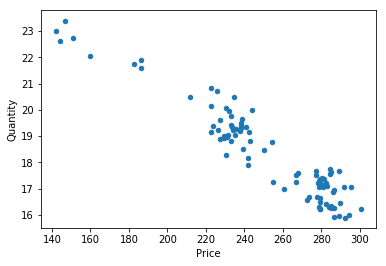

In [4]:
beef.plot(x='Price',y='Quantity',kind='scatter')

In [5]:
beef_model = ols("Quantity ~ Price",data=beef).fit()
print(beef_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     811.2
Date:                Wed, 26 Dec 2018   Prob (F-statistic):           1.69e-46
Time:                        23:45:41   Log-Likelihood:                -77.493
No. Observations:                  91   AIC:                             159.0
Df Residuals:                      89   BIC:                             164.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0515      0.413     72.701      0.0

The small P values indicate that we can reject the null hypothesis that price has no effect on Quantity

Hight R^2 indicates that our model explains a lot of the response variability

In regression analysis, we'd like our regression model to have significant variables and to produce a high R^2 value

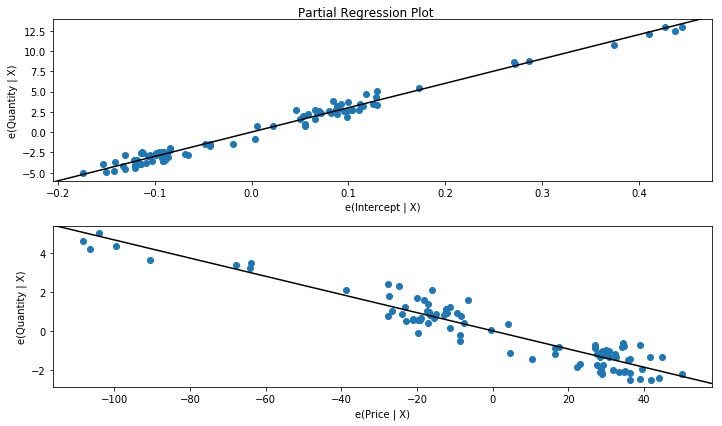

In [7]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_partregress_grid(beef_model,fig=fig)

#### Component-Component plus Residual (CCPR) Plots
The CCPR plot provides a way to judge the effect of one regressor on the response variable by taking into account the effects of the other independent variables

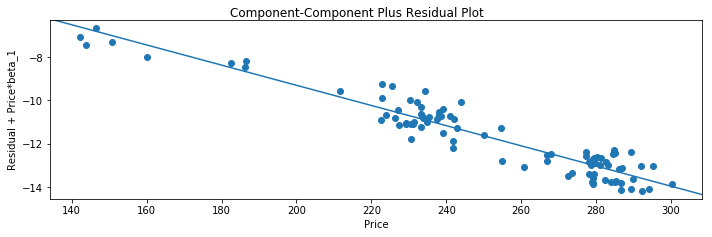

In [9]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_ccpr_grid(beef_model,fig=fig)

### Regression plots
we use plot_regress_exog function to quickly check model assumptions with respect to a single regressor, Price in this case

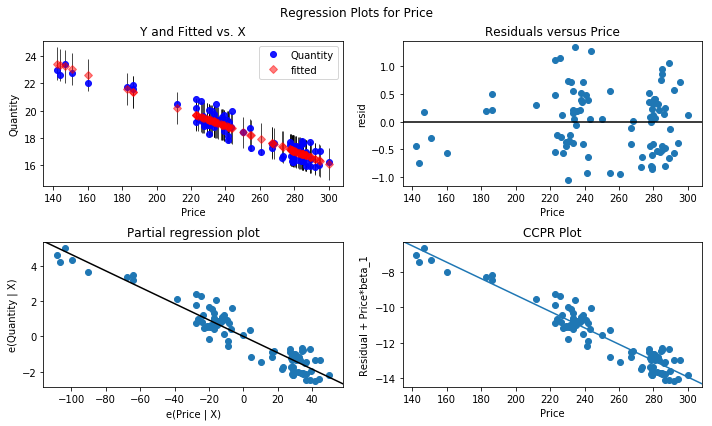

In [10]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(beef_model,'Price',fig=fig)

#### Recursive Least Square(RLS)
Finally we apply Recursive Least Square(RLS) filter to investigate parameter instability

In [11]:
beef['Year'] = pd.to_datetime(beef['Year'],format='%Y')

In [12]:
from pandas.tseries.offsets import *
beef['Date'] = beef.apply(lambda x: (x['Year']+BQuarterBegin(x['Quarter'])),axis=1)
beef.drop(['Year','Quarter'],axis=1,inplace=True)
beef.set_index('Date',inplace=True)
beef.head(10)

,Quantity,Price
Date,,
1977-03-01,22.9976,142.1667
1977-06-01,22.6131,143.9333
1977-09-01,23.4054,146.5000
1977-12-01,22.7401,150.8000
1978-03-01,22.0441,160.0000
1978-06-01,21.7602,182.5333
1978-09-01,21.6064,186.2000
1978-12-01,21.8814,186.4333
1979-03-01,20.5086,211.7000


#### RLS estimation

In [15]:
endog = beef['Quantity']
exog = sm.add_constant(beef['Price'])
mod = sm.RecursiveLS(endog,exog)
res = mod.fit()
print(res.summary())

                           Statespace Model Results                           
Dep. Variable:               Quantity   No. Observations:                   91
Model:                    RecursiveLS   Log Likelihood                 -84.326
Date:                Thu, 27 Dec 2018   AIC                            172.653
Time:                        00:52:58   BIC                            177.630
Sample:                    03-01-1977   HQIC                           174.659
                         - 09-01-1999                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.0515      0.413     72.700      0.000      29.241      30.862
Price         -0.0465      0.002    -28.482      0.000      -0.050      -0.043
Ljung-Box (Q):                      422.30   Jarque-

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency BQS-DEC will be used.
  % freq, ValueWarning)


The RLS model computes the regression parameters recursively, so there are as many estimates as there are data points, the summary table only presents the regression parameters estimated on the entire sample; these estimates are equivalent to OLS estimates

#### RLS plots

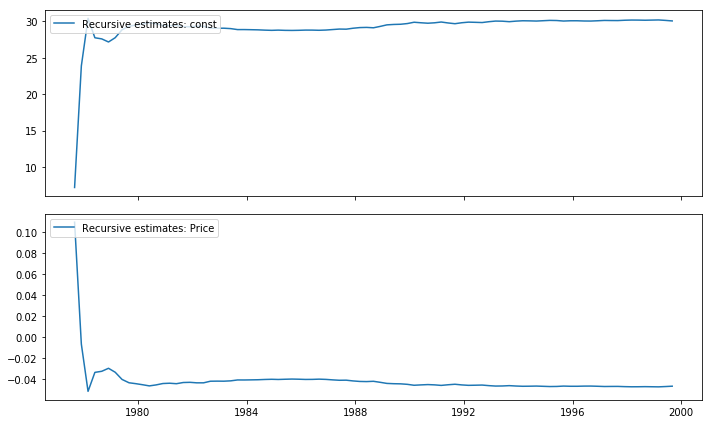

In [16]:
res.plot_recursive_coefficient(range(mod.k_exog),alpha=None,figsize=(10,6));

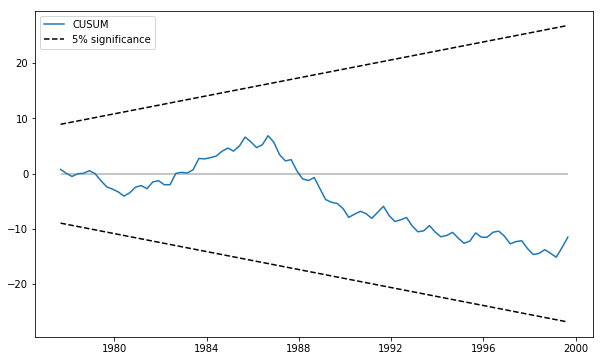

In [17]:
fig = res.plot_cusum(figsize=(10,6));

In the plot above, the CUSUM statistic doesn't move outside of the 5% significance bands, so we fail to reject the null hypothesis of stable parameters at the 5% level